<a href="https://colab.research.google.com/github/CaioPadoa/Projetos-DSNP-3.0/blob/main/MADRID_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Madrid, na Espanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2022-03-10/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* id = número de identificação do imóvel
* name = nome do imóvel anunciado
* host_id = número de identificação do anfitrião do imóvel
* host_name = nome do anfitrião no imóvel
* neighbourhood_group = região do bairro em que o imóvel se localiza
* neighbourhood = nome do bairro
* latitude = latitude do imóvel
* longitude = longitude do imóvel
* room_type = tipo de quarto do imóvel que é oferecido
* price = preço do aluguél do imóvel
* minimum_nights = quantidade mínima de noites para aluguel
* number_of_reviews = número total de reviews do imóvel
* last_review = data do último review
* reviews_per_month = número de reviews por mês
* calculated_host_listing_count = número de imóveis que o anfitrião possui
* availability_365 = número de dias em que o imóvel está disponível (de um total de 365)
* number_of_reviews_ltm = quantos reviews o imóvel teve no último mês
* license = número de licensa/registro do imóvel


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,34217435,Luis,Centro,Justicia,40.41969,-3.69736,Entire home/apt,78,2,122,2022-01-06,0.86,9,247,4,NaN
1,47957,"Amazing Apartment, Salamanca Distri",218515,Sergio,Salamanca,Goya,40.42792,-3.67682,Entire home/apt,82,10,57,2022-01-08,0.42,2,238,2,NaN
2,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,56,1,123,2022-02-28,2.63,2,351,44,NaN
3,70059,Tu hogar en centro de Madrid.,353616,Diana,Centro,Universidad,40.42381,-3.71038,Entire home/apt,51,30,55,2022-01-31,0.41,1,38,14,VT-7440
4,70073,Adorable Apartment Malasaña-Gran Via,353738,Raquel,Centro,Universidad,40.42252,-3.70250,Entire home/apt,84,28,25,2022-02-27,0.20,3,286,6,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 18310
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/ df.shape[0]).sort_values(ascending = False)

license                           0.850355
reviews_per_month                 0.227963
last_review                       0.227963
host_name                         0.000273
name                              0.000164
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [3]:
#coluna "license" tem muitos valores ausentes, e não é importante para a análise
df.drop("license", axis = 1, inplace = True)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,34217435,Luis,Centro,Justicia,40.41969,-3.69736,Entire home/apt,78,2,122,2022-01-06,0.86,9,247,4
1,47957,"Amazing Apartment, Salamanca Distri",218515,Sergio,Salamanca,Goya,40.42792,-3.67682,Entire home/apt,82,10,57,2022-01-08,0.42,2,238,2
2,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Arturo,Centro,Justicia,40.41884,-3.69655,Private room,56,1,123,2022-02-28,2.63,2,351,44
3,70059,Tu hogar en centro de Madrid.,353616,Diana,Centro,Universidad,40.42381,-3.71038,Entire home/apt,51,30,55,2022-01-31,0.41,1,38,14
4,70073,Adorable Apartment Malasaña-Gran Via,353738,Raquel,Centro,Universidad,40.42252,-3.70250,Entire home/apt,84,28,25,2022-02-27,0.20,3,286,6


### **Q3. Qual o tipo de distribuição das variáveis?** 

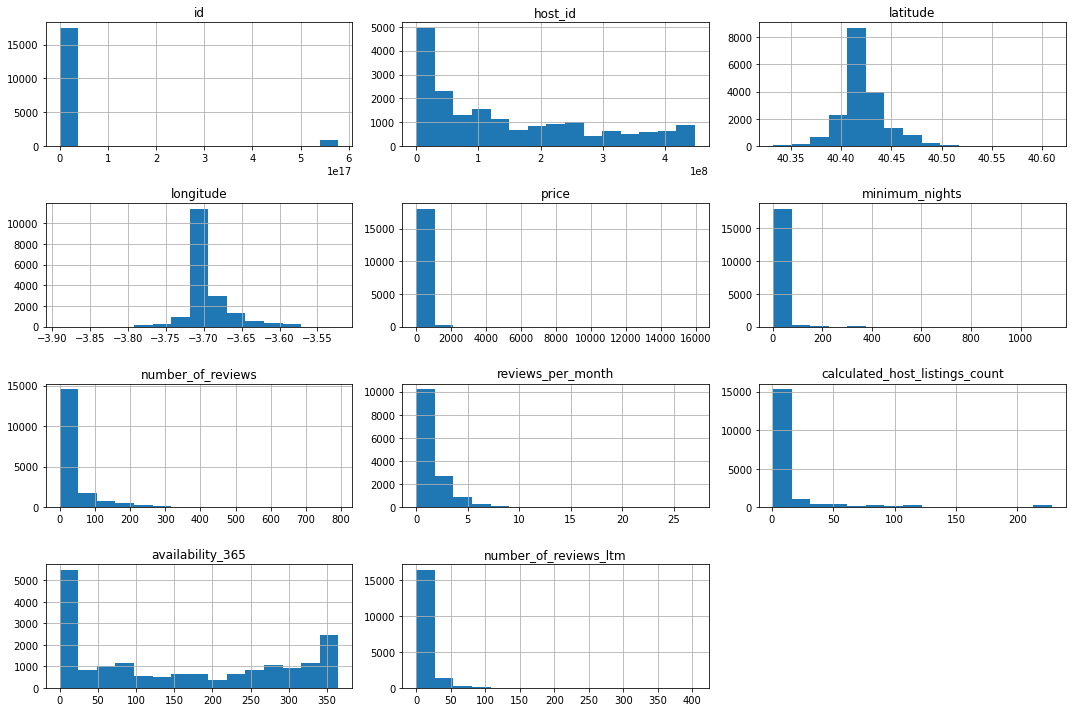

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 15, figsize=(15,10));
plt.tight_layout()
plt.show();

Já é possível observar, pela análise dos histogramas, que a coluna "price" possui outliers siginificativos, tendo em vista que a grande maioria dos preços está não ultrapassa o valor de 2000. Assim como ela também está a coluna "minimum_nights".

Além disso, pela visualização gráfica, podemos afirmar que nenhuma variável segue uma distribuição normal.

In [ ]:
#identificando outliers
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,18310.000000,18310.000000,18310.000000,14136.000000,18310.000000,18310.000000
mean,137.062589,8.054615,37.149153,1.378546,13.018351,154.079137
std,360.911428,36.206187,70.708416,1.585942,32.089350,136.970940
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,42.000000,1.000000,1.000000,0.240000,1.000000,0.000000
50%,75.000000,2.000000,7.000000,0.850000,2.000000,126.000000
75%,120.000000,3.000000,39.000000,2.000000,8.000000,290.000000
max,15960.000000,1125.000000,792.000000,27.060000,228.000000,365.000000


* A variável "price" possui 75% dos seus valores abaixo de 120, porém seu máximo é 15960.
* A variável "minimum_nights" possui 75% os seus valores abaixo de 3, porém seu máximpo é 1125. Além disso, seu desvio-padrão (36.2) é muito alto.

* Serão excluídos os outliers seguindo o seguinte critério:
  - Preço acima de 1220, já que esse valor indica um z_score acima de 3 (ou seja, o valor a mais de 3 desvios padrões da média) 
  - Quantidade mínima de noites acima de 30 (por caracterizar um mês)

In [33]:
#Descobrir valor de corte dos outliers (valor em que o z_score é maior que 3)
def limite(z):
  x = ((df.price.std() * z) + df.price.mean())
  return x

valor_limite = limite(3)
print(valor_limite)

1219.7968722016212


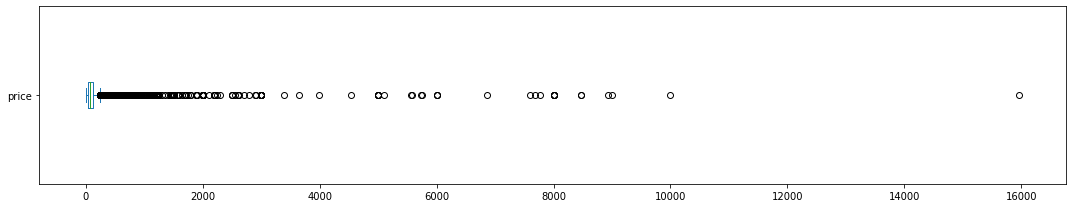


price: valores acima do valor limite (1220)
218 entradas
1.1906%


In [55]:
#Boxtplot para price
df.price.plot(kind = "box", vert = False, figsize = (15,3))
plt.tight_layout()
plt.show();

#Identificando outliers 
print("\nprice: valores acima do valor limite (1220)")
print("{} entradas".format(len(df[df.price > valor_limite])))
print("{:.4f}%".format((len(df[df.price > valor_limite]) / df.shape[0]) * 100))

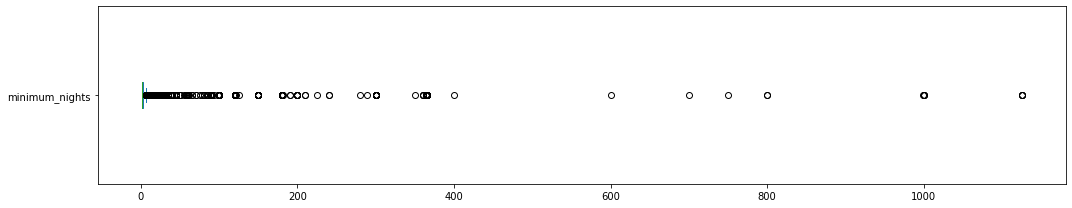

minimum_nights: valores acima de 30:
597 entradas
3.2605%


In [35]:
#Boxplot para minimum_nights
df.minimum_nights.plot(kind = "box", vert = False, figsize = (15,3))
plt.tight_layout()
plt.show();

#Identificando outliers (>30 dias)
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100 ))

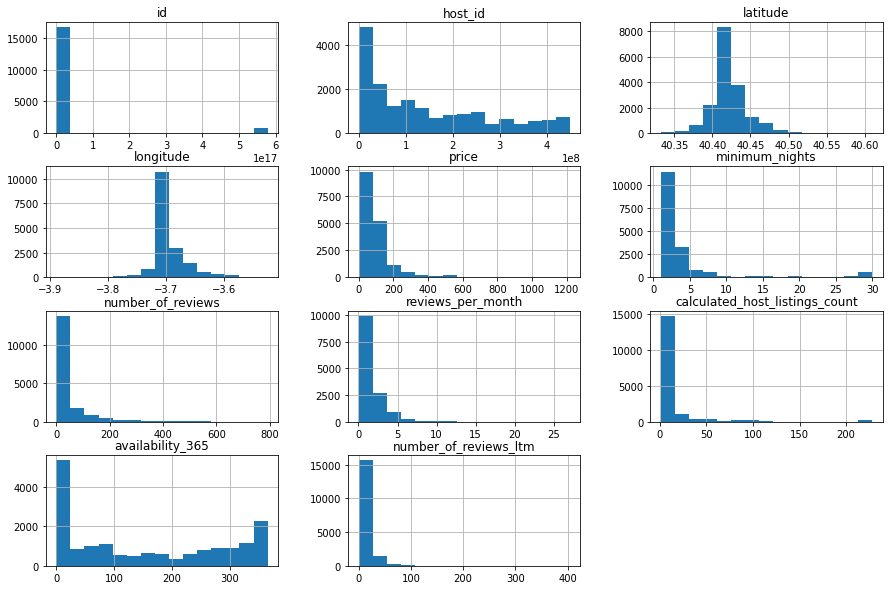

In [36]:
#Excluindo outliers em um novo DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > valor_limite].index, axis = 0, inplace = True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis = 0, inplace = True)

#plotando novo histograma
df_clean.hist(bins = 15, figsize = (15,10))
plt.show();

### **Q4. Qual a média dos preços de aluguel?**

In [37]:
# ver a média da coluna `price``
df_clean.price.mean()

111.53145101610976

### **Q4. Qual a correlação existente entre as variáveis**

In [40]:
# criar uma matriz de correlação
df_correlacao = df_clean[["price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]].corr()

# mostrar a matriz de correlação
display(df_correlacao)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.077965,-0.086024,-0.056788,0.063785,0.137460
minimum_nights,-0.077965,1.000000,-0.083787,-0.158597,-0.008263,0.018904
number_of_reviews,-0.086024,-0.083787,1.000000,0.606602,-0.021874,0.026245
reviews_per_month,-0.056788,-0.158597,0.606602,1.000000,0.024299,0.139709
calculated_host_listings_count,0.063785,-0.008263,-0.021874,0.024299,1.000000,0.153386
availability_365,0.137460,0.018904,0.026245,0.139709,0.153386,1.000000


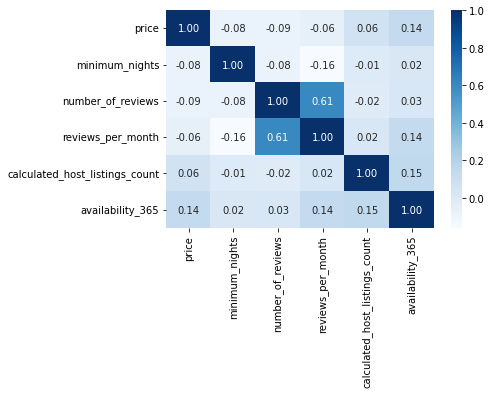

In [42]:
# plotar um heatmap a partir das correlações
sns.heatmap(df_correlacao, annot = True, cmap = "Blues", fmt = ".2f")
plt.show();

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [44]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10792
Private room        6389
Shared room          231
Hotel room           155
Name: room_type, dtype: int64

In [45]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]).sort_values(ascending = False)

Entire home/apt    0.614334
Private room       0.363693
Shared room        0.013150
Hotel room         0.008823
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [48]:
# ver preços por bairros, na média
df_clean.groupby(["neighbourhood"]).price.mean().sort_values(ascending = False)[:5]

neighbourhood
Rosas         372.538462
Hellín        283.028571
Amposta       267.416667
Arcos         249.187500
Canillejas    213.492754
Name: price, dtype: float64

In [ ]:
#quantidade de imóveis em Rosas
print(df_clean[df_clean.neighbourhood == "Rosas"].shape)

#exibir entradas de Hellín
df_clean[df_clean.neighbourhood == "Hellín"]

Em Hellín, alguns poucos imóveis inflacionaram o preço médio do bairro.

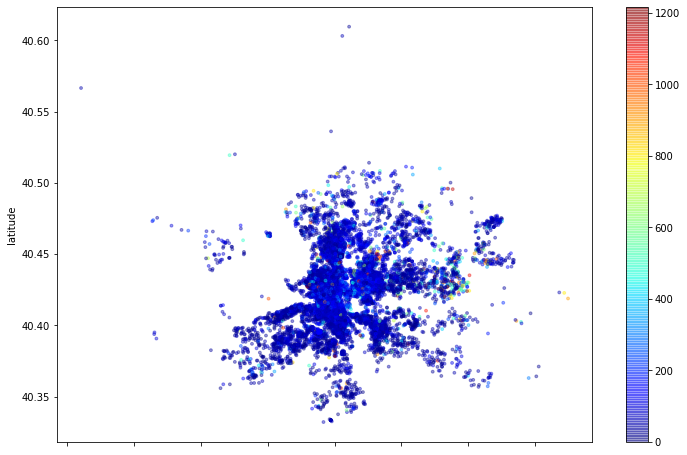

In [53]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind = "scatter", x="longitude", y="latitude", alpha=0.4, c=df_clean.price, s=8, cmap=plt.get_cmap("jet"), figsize=(12,8))
plt.show();

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [54]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

3.7370068879148404

## Conclusões


A base de dados do Airbnb de Madrid apresentaram, desde o começo, uma série de outliers.

No preço, imóveis com valor acima de 1220 tiveram que ser cortados, através do método de z-score.

Na quantidade mínima de noites, arbitrariamente decidi cortar os valores acima de 30 (equivalente a um mês), por considerar mais verossímil. Entretanto, se também fosse seguir o método de z_score, o resultado poderia ser diferente.

Outro ponto relevante é a falta de correlações fortes entre as variáveis. Seguindo o método de Pearson, apenas as variáveis "numero de reviews" e "reviews por mes" possuem uma correlação moderada, de 0.61.

Isso indica que provavelmente será muito difícil estabelecer um modelo preditivo de preços com esta base de dados. 

Outro ponto interessante é a localização média dos imóveis do Airbnb em Madrid. A esmagadora maioria dos imóveis localiza-se na área do centro-sul da cidade, mostrando uma grande aglomeração de espaços nesta região. 

Ademais, mais de 97% de todos os imóveis cadastrados são ou apartamentos completos ou quartos privados. Isso é um fato bem verossímil, tendo em vista que o comportamento do consumidor médio do Airbnb leva em conta a questão da privacidade, e um quarto compartilhado não parece estar nas preferências deste consumidor.

Ainda me referindo ao comportamento do consumidor, o fato da média de noites mínimas necessárias para o aluguel ser igual a 3 demonstra um padrão de comportamento típico de turistas, que não pretendem ficar muito tempo no mesmo lugar.